In [3]:
from pylab import rcParams
from windrose import (WindroseAxes, WindAxes, WindAxesFactory)
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
import pandas as pd


rose_color = (.918,.576,.576)
speed_color = (1.0,74.9,52.5)

plt.style.use('seaborn-whitegrid')
plt.ion()
font = {'family' : 'monospace',
        'weight' : 'medium',
        'size'   : 14}
plt.rc('font', **font)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [9]:
def plot_wind_rose(df, bins = np.arange(0, 25, 5), quantiles = np.arange(5,15,step=5), cmap=cm.viridis):
    ws = df['Speed']
    wd = df['Direction']
    
    fig = plt.figure()
    
    # windrose_axes = WindAxesFactory.create('windroseaxes', ax=ax)
    windrose_axes = WindroseAxes.from_ax(fig=fig)
    windrose_axes.bar(wd , ws, normed=True, opening=0.8, edgecolor='white', bins=bins[:-1], cmap=cmap)
    windrose_axes.set_yticks(quantiles)
    windrose_axes.set_yticklabels([str(t / 100 ) for t in quantiles])
    # windrose_axes.set_legend()

    ax2 = fig.add_axes([0.0, .1, 0.05, 0.8])
    norm = mpl.colors.BoundaryNorm(bins, cmap.N)
    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
        spacing='proportional', extend='max', ticks=bins, format='%1i')
    # boundaries=bounds,

    cb.set_ticklabels([str(b) + 'm/s' for b in bins])

    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    plt.margins(0,0)
    print(bins)
    print(quantiles)
    return fig

90.0 90.0


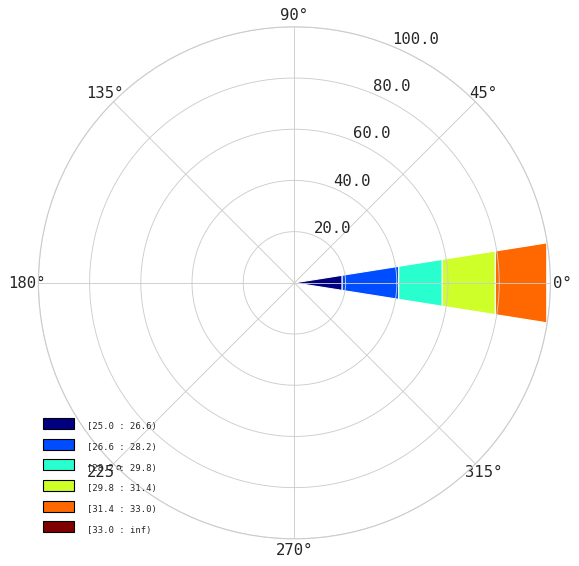

In [5]:
ws = np.random.random(500) * 8 + 25
wd = np.random.random(500) * 0 + 90
print(np.min(wd), np.max(wd))
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

[ 0  5 10 15 20]
[ 5 10]


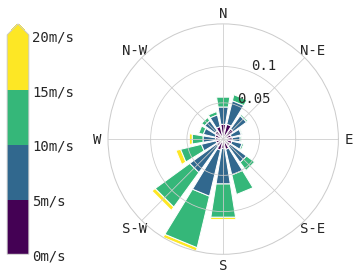

In [9]:
df = pd.read_csv ('/home/ctripp/data/hopp/resource/loc_1_high_correlation.csv')
fig = plot_wind_rose(df)
plt.savefig('loc_1_high_correlation_rose.svg', format='svg')

[ 0  5 10 15 20]
[ 5 10]


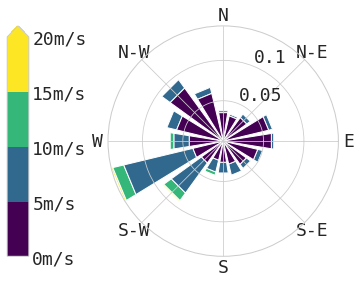

In [5]:
df = pd.read_csv ('/home/ctripp/data/hopp/resource/loc_2_low_correlation.csv')
fig = plot_wind_rose(df)
plt.savefig('loc_2_low_correlation_rose.svg', format='svg')

In [75]:
def plot_wind_rose2(df, bins = np.arange(0, 25, 5), quantiles = np.arange(5,15,step=5), cmap=cm.viridis):
    ws = df['Speed']
    wd = df['Direction']
    
    # (3, 5) + (3, 1)
    fig = plt.figure(figsize=(3,6))
    
    # windrose_axes = WindAxesFactory.create('windroseaxes', ax=ax)
    windrose_axes = WindroseAxes.from_ax(fig=fig)
    windrose_axes.bar(wd , ws, normed=True, opening=0.85, edgecolor='white', bins=bins[:-1], cmap=cmap)
    windrose_axes.set_yticks(quantiles)
    windrose_axes.set_yticklabels([str(t / 100 ) for t in quantiles])
    # windrose_axes.set_legend()

    ax2 = fig.add_axes([0.05, .15, .90, .05])
    norm = mpl.colors.BoundaryNorm(bins, cmap.N)
    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
        spacing='proportional', extend='max', ticks=bins, format='%1i', orientation='horizontal')
    # boundaries=bounds,

    labels = [str(b) for b in bins]
    labels[-1] = labels[-1] + 'm/s'
    cb.set_ticklabels(labels)

    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    plt.margins(0,0)
    print(bins)
    print(quantiles)
    return fig

[ 0  5 10 15 20]
[ 5 10]


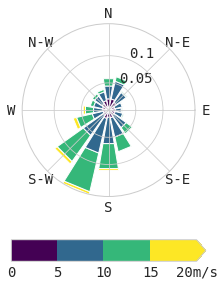

In [79]:
df = pd.read_csv ('/home/ctripp/data/hopp/resource/loc_1_high_correlation.csv')
fig = plot_wind_rose2(df)
plt.savefig('loc_1_high_correlation_rose.svg', format='svg')

[ 0  5 10 15 20]
[ 5 10]


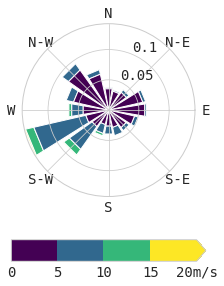

In [80]:
df = pd.read_csv ('/home/ctripp/data/hopp/resource/loc_2_low_correlation.csv')
fig = plot_wind_rose2(df)
plt.savefig('loc_2_low_correlation_rose.svg', format='svg')